**Data Wrangling**

Para esta entrega se reemplazan los valores nulos de "Edad", "Peso" y "Altura" con el método el "forward fill" ("ffill"), de forma que los valores no nulos se copian "hacia adelante" siempre que se encuentren valores nulos. 

El análisis de los valores atípicos y su tratamiento así como el abordaje el desbalance de datos se hará posteriormente.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d
pd.set_option ('display.notebook_repr_html', True)
pd.set_option ('display.max_columns', 10)

pd.set_option ('display.max_rows', 10)
%matplotlib inline
import seaborn as sb
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import sklearn 
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
mpl.rcParams['figure.dpi'] = 400
import graphviz 
from google.colab import drive
import os 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
sns.set_style('whitegrid')
drive.mount ('/content/gdrive') 
from statistics import mode

Mounted at /content/gdrive


In [2]:
%cd '//content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica'

/content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica


**EDA**

In [3]:
!head -10 athlete_events.csv

"ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"
"1","A Dijiang","M",24,180,80,"China","CHN","1992 Summer",1992,"Summer","Barcelona","Basketball","Basketball Men's Basketball",NA
"2","A Lamusi","M",23,170,60,"China","CHN","2012 Summer",2012,"Summer","London","Judo","Judo Men's Extra-Lightweight",NA
"3","Gunnar Nielsen Aaby","M",24,NA,NA,"Denmark","DEN","1920 Summer",1920,"Summer","Antwerpen","Football","Football Men's Football",NA
"4","Edgar Lindenau Aabye","M",34,NA,NA,"Denmark/Sweden","DEN","1900 Summer",1900,"Summer","Paris","Tug-Of-War","Tug-Of-War Men's Tug-Of-War","Gold"
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 500 metres",NA
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 1,000 metres",NA
"5","Christine Jacoba Aaftink","F",25,1

In [4]:
df_atletas= pd.read_csv('athlete_events.csv',sep=',')
df_atletas[['Name','Sex', 'Age']].head()

,Name,Sex,Age
0,A Dijiang,M,24.0
1,A Lamusi,M,23.0
2,Gunnar Nielsen Aaby,M,24.0
3,Edgar Lindenau Aabye,M,34.0
4,Christine Jacoba Aaftink,F,21.0


In [5]:
df_atletas.shape

(271116, 15)

**Segmentación del dataframe original en 2 subconjuntos en función del género de los atletas**

In [6]:
df_M=df_atletas[df_atletas.Sex == "F" ] # dataframe para atletas Mujeres
df_H=df_atletas[df_atletas.Sex == "M" ] # dataframe para atletas Hombres

**HOMBRES EN LOS JUEGOS OLÍMPICOS**

In [7]:
df_H.shape

(196594, 15)

In [8]:
df_H.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [9]:
print(df_H.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196594 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      196594 non-null  int64  
 1   Name    196594 non-null  object 
 2   Sex     196594 non-null  object 
 3   Age     187544 non-null  float64
 4   Height  143567 non-null  float64
 5   Weight  141470 non-null  float64
 6   Team    196594 non-null  object 
 7   NOC     196594 non-null  object 
 8   Games   196594 non-null  object 
 9   Year    196594 non-null  int64  
 10  Season  196594 non-null  object 
 11  City    196594 non-null  object 
 12  Sport   196594 non-null  object 
 13  Event   196594 non-null  object 
 14  Medal   28530 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 24.0+ MB
None


**1 - Limpieza de Datos**

Vemos que las columnas "Height", "Weight" y "Age" tienen valores nulos. Luego analizaremos la conveniencia de reemplazarlos por otro valor. para la columna "Medal" es factible de tener valores nulos en la mayoría de los registros dados que muestra los atletas que no obtuvieron medallas.

1) En la columna "Medal" se reemplazan los valores NA con la expresión "sin medalla"

In [10]:
x = df_H["Medal"]

df_H["Medal"].fillna('sin medalla', inplace = True)

df_H["Medal"].replace([0], 'sin medalla')

0         sin medalla
1         sin medalla
2         sin medalla
3                Gold
10        sin medalla
             ...     
271111    sin medalla
271112    sin medalla
271113    sin medalla
271114    sin medalla
271115    sin medalla
Name: Medal, Length: 196594, dtype: object

 2) Se completan los valores nulos de "Age", "Height" y "Weight" con el método "ffill"

In [11]:
df_H_1=df_H.fillna(axis = 0, method = "ffill") # método "ffill"



In [12]:
df_H_1

,ID,Name,Sex,Age,Height,...,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,...,Summer,Barcelona,Basketball,Basketball Men's Basketball,sin medalla
1,2,A Lamusi,M,23.0,170.0,...,Summer,London,Judo,Judo Men's Extra-Lightweight,sin medalla
2,3,Gunnar Nielsen Aaby,M,24.0,170.0,...,Summer,Antwerpen,Football,Football Men's Football,sin medalla
3,4,Edgar Lindenau Aabye,M,34.0,170.0,...,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
10,6,Per Knut Aaland,M,31.0,188.0,...,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,sin medalla
...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,...,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,sin medalla
271112,135570,Piotr ya,M,27.0,176.0,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",sin medalla
271113,135570,Piotr ya,M,27.0,176.0,...,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",sin medalla
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,...,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,sin medalla


In [13]:
df_H_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196594 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      196594 non-null  int64  
 1   Name    196594 non-null  object 
 2   Sex     196594 non-null  object 
 3   Age     196594 non-null  float64
 4   Height  196594 non-null  float64
 5   Weight  196594 non-null  float64
 6   Team    196594 non-null  object 
 7   NOC     196594 non-null  object 
 8   Games   196594 non-null  object 
 9   Year    196594 non-null  int64  
 10  Season  196594 non-null  object 
 11  City    196594 non-null  object 
 12  Sport   196594 non-null  object 
 13  Event   196594 non-null  object 
 14  Medal   196594 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 24.0+ MB


**2 - Análisis de Medallas**

**Visualización de la proporción de cada color de medalla**

In [14]:
Medallas_por_Color=df_H_1[['Medal','ID']].groupby(by='Medal').count()
Medallas_por_Color

,ID
Medal,
Bronze,9524
Gold,9625
Silver,9381
sin medalla,168064


In [15]:
Medallas_por_Color.index

Index(['Bronze', 'Gold', 'Silver', 'sin medalla'], dtype='object', name='Medal')

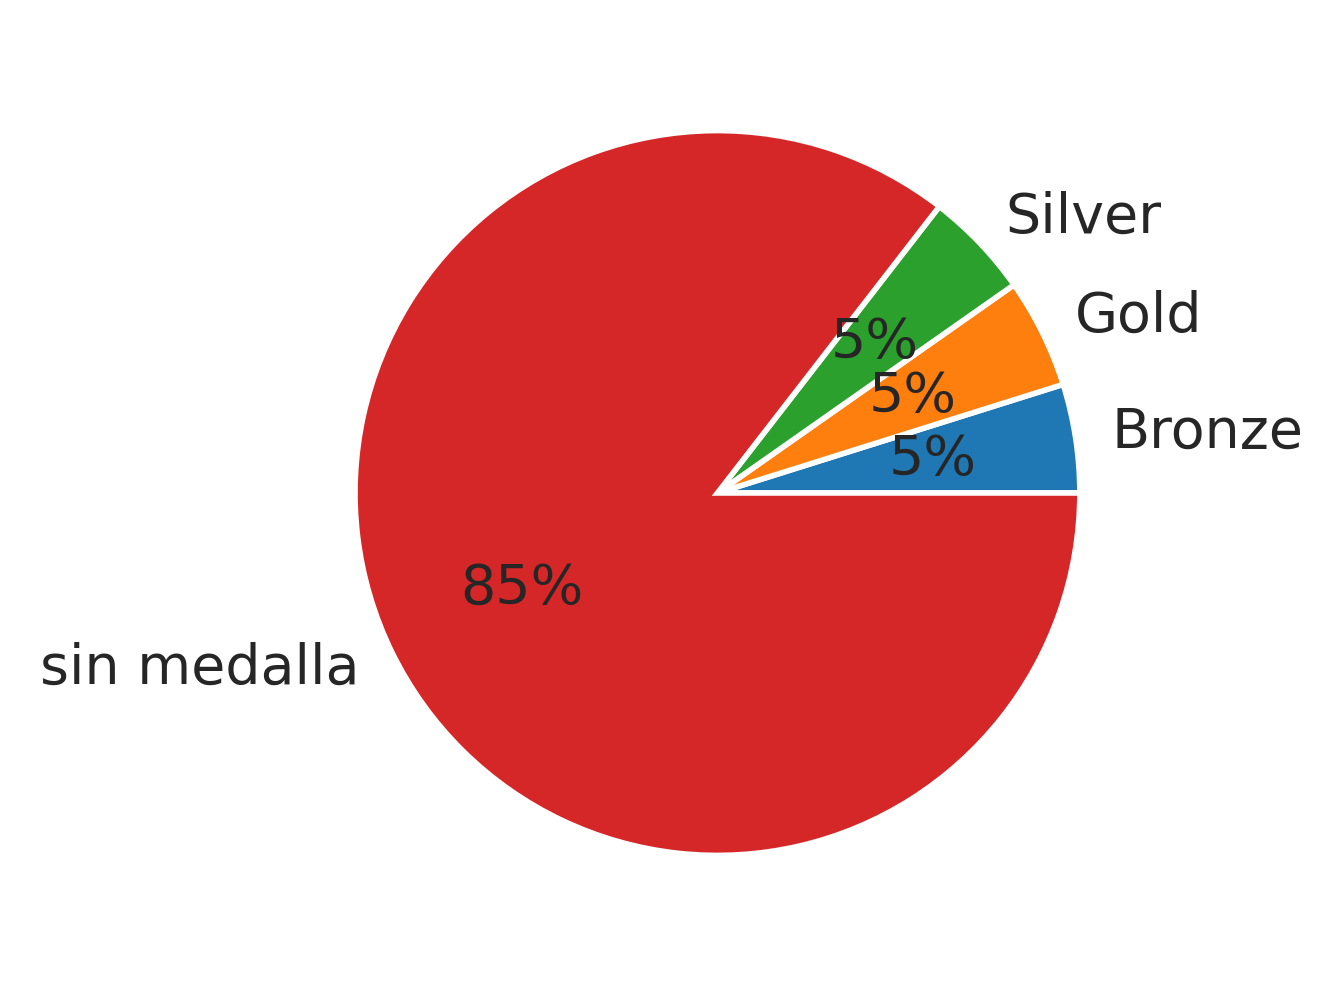

In [16]:
fig,ax = plt.subplots(figsize =(6, 3))
plt.pie(Medallas_por_Color.ID, labels=Medallas_por_Color.index,autopct = '%0.0f%%')
plt.show()

Se visualiza que hay un **desbalance en los datos**. Donde la categoría "sin medalla" supera ampliamente al resto de las categorías ("Gold", "Silver" y "Bronze")

**Segmentación el Dataframe df_H por color de Medalla para visualizar el comportamiento de la variable "Medal" en función de otras características**

In [17]:
df_H_Oro=df_H_1[df_H_1.Medal == "Gold" ] # dataframe para atletas Hombres con medallas de oro
df_H_Plata=df_H_1[df_H_1.Medal == "Silver" ] # dataframe para atletas Hombres con medallas de plata
df_H_Bronce=df_H_1[df_H_1.Medal == "Bronze" ] # dataframe para atletas Hombres con medallas de bronce
df_H_Sin_M=df_H_1[df_H_1.Medal == "sin medalla" ] # dataframe para atletas Hombres sin medallas

**3 - Análisis de la Edad de las Atletas**

**Distribución de las medallas según la edad de los ateltas**

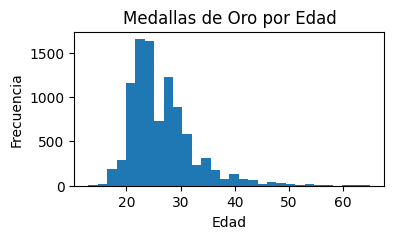

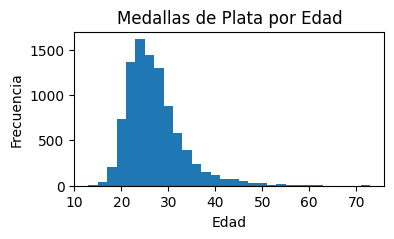

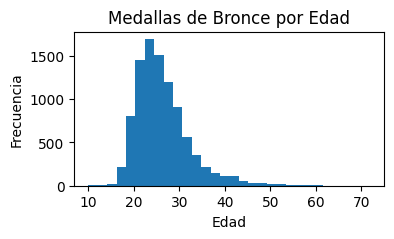

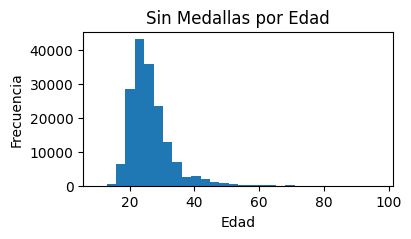

In [18]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_H_Oro.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Edad')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_H_Plata.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Edad')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_H_Bronce.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Edad')
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_H_Sin_M.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Edad')

plt.show()

**a - Oro**









In [19]:
df_H_Oro.Age.describe() # Valores Estadísticos

count    9625.000000
mean       26.537351
std         6.058910
min        13.000000
25%        22.000000
50%        25.000000
75%        29.000000
max        65.000000
Name: Age, dtype: float64

In [20]:
mode(df_H_Oro.Age) # Moda

23.0

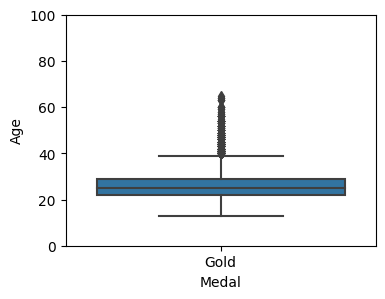

In [21]:
# Valores Atípicos 
var = 'Age'
data = pd.concat([df_H_Oro['Medal'], df_H_Oro[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=100);

**b - Plata**

In [22]:
df_H_Plata.Age.describe() # Valores Estadísticos

count    9381.000000
mean       26.618058
std         6.191442
min        13.000000
25%        22.000000
50%        25.000000
75%        29.000000
max        73.000000
Name: Age, dtype: float64

In [23]:
mode(df_H_Plata.Age) # Moda

23.0

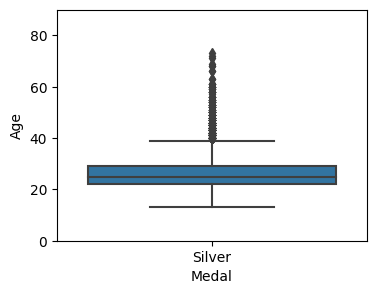

In [24]:
#  Valores Atípicos 
var = 'Age'
data = pd.concat([df_H_Plata['Medal'], df_H_Plata[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=90);

**c - Bronce**

In [25]:
df_H_Bronce.Age.describe() # Valores Estadísticos

count    9524.000000
mean       26.363398
std         5.940951
min        10.000000
25%        22.000000
50%        25.000000
75%        29.000000
max        72.000000
Name: Age, dtype: float64

In [26]:
mode(df_H_Bronce.Age) # Moda

23.0

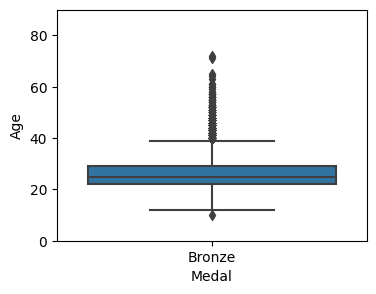

In [27]:
#  Valores Atípicos  
var = 'Age'
data = pd.concat([df_H_Bronce['Medal'], df_H_Bronce[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=90);

**d - Sin Medalla**

In [28]:
df_H_Sin_M.Age.describe() # Valores Estadísticos 

count    168064.000000
mean         26.267481
std           6.537418
min          10.000000
25%          22.000000
50%          25.000000
75%          29.000000
max          97.000000
Name: Age, dtype: float64

In [29]:
mode(df_H_Sin_M.Age) # Moda

24.0

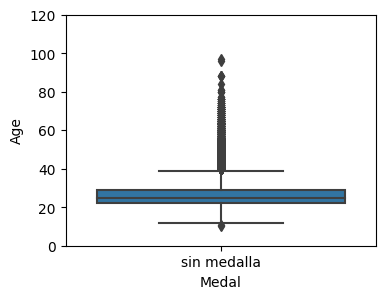

In [30]:
# Valores Atípicos 
var = 'Age'
data = pd.concat([df_H_Sin_M['Medal'], df_H_Sin_M[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=120);

**3 - Análisis de la Altura de los Atletas**

**Distribución de las medallas según la altura de los atletas**

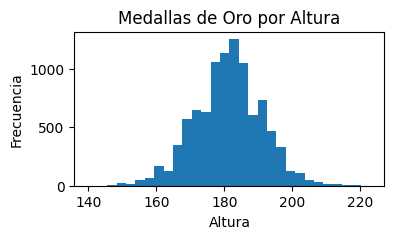

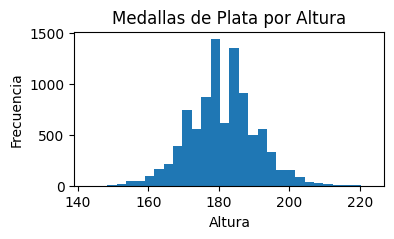

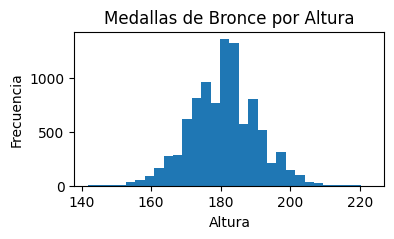

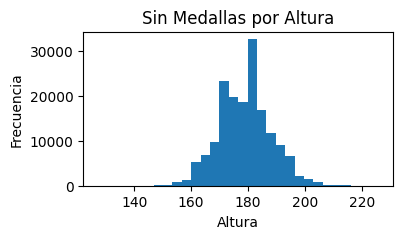

In [31]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_H_Oro.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Altura')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_H_Plata.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Altura')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_H_Bronce.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Altura')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_H_Sin_M.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Altura')
plt.show()

**a - Oro**

In [32]:
df_H_Oro.Height.describe() # Valores Estadísticos

count    9625.000000
mean      181.173714
std         9.840982
min       140.000000
25%       175.000000
50%       181.000000
75%       188.000000
max       223.000000
Name: Height, dtype: float64

In [33]:
mode(df_H_Oro.Height) # Moda

180.0

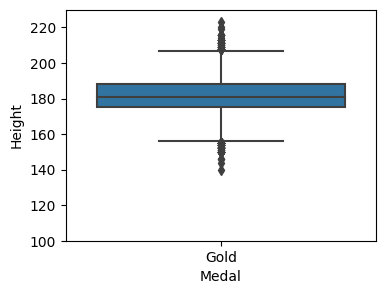

In [34]:
# Valores Atípicos 
var = 'Height'
data = pd.concat([df_H_Oro['Medal'], df_H_Oro[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**b - Plata**

In [35]:
df_H_Plata.Height.describe() # Valores Estadísticos

count    9381.000000
mean      180.880503
std         9.683681
min       143.000000
25%       175.000000
50%       181.000000
75%       187.000000
max       223.000000
Name: Height, dtype: float64

In [36]:
mode(df_H_Plata.Height) # Moda

180.0

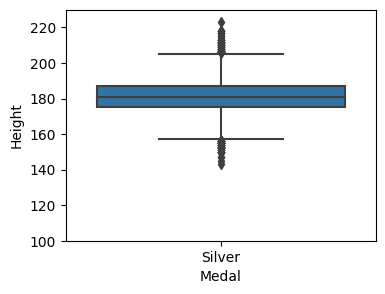

In [37]:
# Valores Atípicos 
var = 'Height'
data = pd.concat([df_H_Plata['Medal'], df_H_Plata[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**c - Bronce**

In [38]:
df_H_Bronce.Height.describe() # Valores Estadísticos

count    9524.000000
mean      180.757140
std         9.661776
min       142.000000
25%       175.000000
50%       180.000000
75%       187.000000
max       223.000000
Name: Height, dtype: float64

In [39]:
mode(df_H_Bronce.Height) # Moda

180.0

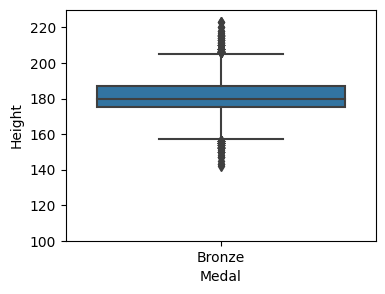

In [40]:
# Valores Atípicos
var = 'Height'
data = pd.concat([df_H_Bronce['Medal'], df_H_Bronce[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**4 - Sin medalla**

In [41]:
df_H_Sin_M.Height.describe() # Valores Estadísticos

count    168064.000000
mean        178.834343
std           9.210912
min         127.000000
25%         173.000000
50%         179.000000
75%         185.000000
max         226.000000
Name: Height, dtype: float64

In [42]:
mode(df_H_Sin_M.Height) # Moda

180.0

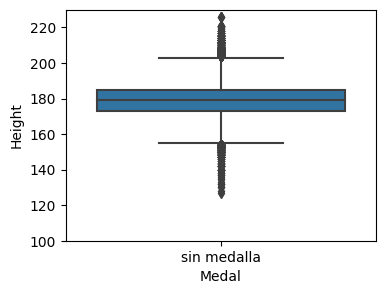

In [43]:
# Valores Atípicos
var = 'Height'
data = pd.concat([df_H_Sin_M['Medal'], df_H_Sin_M[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=230);

**4 - Análisis del Peso de los Atletas**



**Distribución de las medallas según el peso de los atletas**

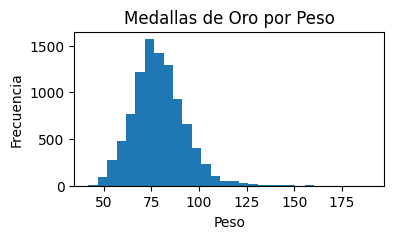

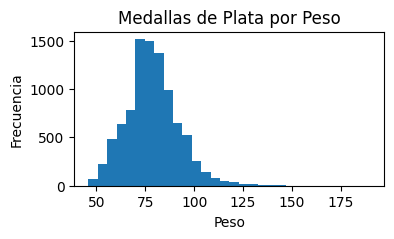

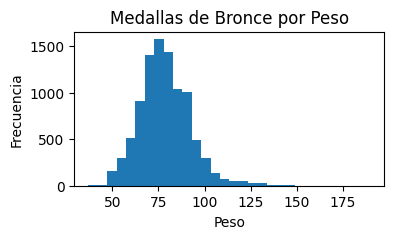

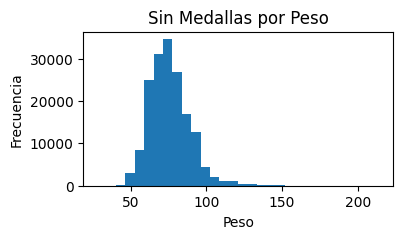

In [44]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_H_Oro.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Peso')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_H_Plata.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Peso')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_H_Bronce.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Peso')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_H_Sin_M.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Peso')
plt.show()

**a - Oro**

In [45]:
df_H_Oro.Weight.describe() # Valores Estadísticos

count    9625.000000
mean       79.058026
std        13.946185
min        42.000000
25%        70.000000
50%        78.000000
75%        87.000000
max       190.000000
Name: Weight, dtype: float64

In [46]:
mode(df_H_Oro.Weight) # Moda

75.0

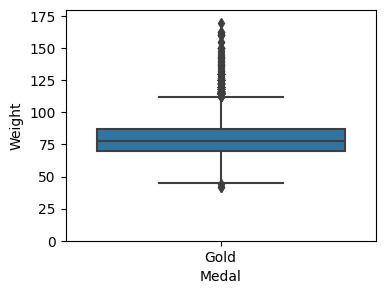

In [47]:
# Valores atípicos
var = 'Weight'
data = pd.concat([df_H_Oro['Medal'], df_H_Oro[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

**b - Plata**

In [48]:
df_H_Plata.Weight.describe() # Valores Estadísticos

count    9381.000000
mean       78.667040
std        13.743162
min        46.000000
25%        70.000000
50%        78.000000
75%        86.000000
max       190.000000
Name: Weight, dtype: float64

In [49]:
mode(df_H_Plata.Weight) # Moda

75.0

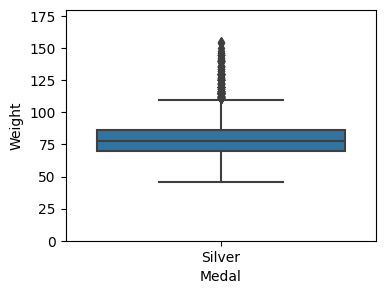

In [50]:
# Valores Atípicos
var = 'Weight'
data = pd.concat([df_H_Plata['Medal'], df_H_Plata[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=180);

**c - Bronce**

In [51]:
df_H_Bronce.Weight.describe() # Valores Estadísticos 

count    9524.000000
mean       78.437929
std        14.024381
min        37.000000
25%        70.000000
50%        77.000000
75%        86.000000
max       190.000000
Name: Weight, dtype: float64

In [52]:
mode(df_H_Bronce.Weight) # Moda

75.0

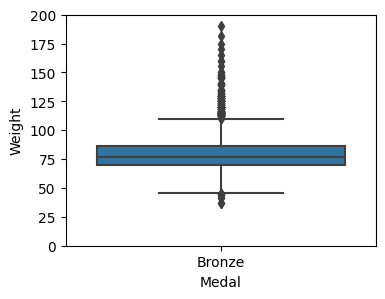

In [53]:
# Valores Atípicos
var = 'Weight'
data = pd.concat([df_H_Bronce['Medal'], df_H_Bronce[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=200);

**d - Sin Medalla**

In [54]:
df_H_Sin_M.Weight.describe() # Valores Estadísticos

count    168064.000000
mean         75.634619
std          13.120656
min          28.000000
25%          67.000000
50%          74.000000
75%          83.000000
max         214.000000
Name: Weight, dtype: float64

In [55]:
mode(df_H_Sin_M.Weight) # Moda

70.0

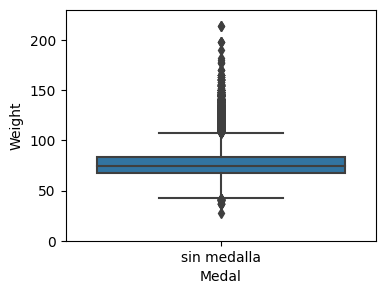

In [56]:
# Valores atípicos
var = 'Weight'
data = pd.concat([df_H_Sin_M['Medal'], df_H_Sin_M[var]], axis=1)
f, ax = plt.subplots(figsize=(4, 3))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=230);

**5 - Análisis de las medallas por NOC que representa a los atletas**

In [57]:
tmp = df_H_1.groupby(['NOC', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()

In [58]:
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']
dfSM = df[df['Medal']== 'sin medalla']

In [59]:
traceG = go.Bar(
    x = dfG['NOC'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['NOC'],
    #orientation = 'h'
)
traceS = go.Bar(
    x = dfS['NOC'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['NOC'],
    #orientation = 'h'
)

traceB = go.Bar(
    x = dfB['NOC'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['NOC'],
   # orientation = 'h'
)

traceSM = go.Bar(
    x = dfSM['NOC'],y = dfSM['ID'],
    name="sin medalla",
    marker=dict(
                color='red',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfSM['NOC'],
   # orientation = 'h'
)
data = [traceG, traceS, traceB, traceSM]
layout = dict(title = 'Medallas por NOC',
          xaxis = dict(title = 'NOC', showticklabels=True, tickangle=45,
            tickfont=dict(
                size=8,
                color='black'),), 
          yaxis = dict(title = 'Número de medallas'),
          hovermode = 'closest',
          barmode='stack',
          showlegend=False,
          width=1200,
          height=600,
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='Medal')

**Nota para el Profesor/Tutor:** Este gráfico fue replicado de un notebook publicado en Kaggle (https://www.kaggle.com/code/gpreda/plotly-tutorial-120-years-of-olympic-games/notebook#Medals) 

Se han adaptado las variables pero no es un desarrollo propio o que se haya visto en el curso. Se agrega porque se considera muy práctico para la interpretación de esta distribución. 

*Claudia Beatriz Perez Lorenzo*

*22/09/2022*